In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
from torchvision import transforms
import os
from tqdm import tqdm
import matplotlib.pyplot as plt


class SingleLayerNN(nn.Module):
    def __init__(self):
        super(SingleLayerNN, self).__init__()
        self.fc = nn.Linear(256, 64)  
        self.out = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc(x)) 
        x = self.out(x)  
        return x

model = SingleLayerNN()


criterion = nn.MSELoss() 
optimizer = optim.Adam(model.parameters(), lr=0.01)  


In [12]:
def neuronalNeuralBalance(inl, oul):

    ninc = torch.zeros_like(inl.weight)
    noul = torch.zeros_like(oul.weight)

    for i in range(inl.weight.data.shape[0]):
        inc = torch.sum(torch.abs(inl.weight.data[i])).item()
        outg = torch.sum(torch.abs(oul.weight.data[:,i])).item()

        # outg = outg / float(len(oul.weight.data[:,i]))
        # inc = inc / float(len(inl.weight.data[i]))

        opt = np.sqrt(outg/inc)

        ninc[i] = inl.weight.data[i]*opt
        noul[:, i] = oul.weight.data[:,i]/opt

    inl.weight.data = ninc
    oul.weight.data = noul




In [13]:
X = torch.randn(10000, 256)
Y = torch.randint(0, 2, (10000, 1)).float()

lay = []
for n, i in model.named_children():
    print(type(i).__name__)
    if type(i).__name__ == "Linear":
        lay.append((n, i))

num_epochs = 10000
for epoch in range(num_epochs):
    optimizer.zero_grad() 
    outputs = model(X)  
    loss = criterion(outputs, Y) 

    # l1_penalty = sum(p.abs().sum() for p in model.parameters())
    # loss += l1_lambda * l1_penalty

    loss.backward() 
    optimizer.step() 
    
    if epoch%50 == 0:
        for i in range(len(lay)):
            if i > 0 and i <= len(lay)-1:
                di = neuronalNeuralBalance(lay[i-1][1], lay[i][1])
        print(f'Epoch {epoch}/{num_epochs}, Loss: {loss.item()}')


Linear
Linear
Epoch 0/10000, Loss: 0.5319234728813171
Epoch 50/10000, Loss: 0.038001105189323425
Epoch 100/10000, Loss: 0.000956712057814002
Epoch 150/10000, Loss: 0.0011384764220565557
Epoch 200/10000, Loss: 6.975235737627372e-05
Epoch 250/10000, Loss: 7.226043180708075e-06
Epoch 300/10000, Loss: 6.150153240014333e-06
Epoch 350/10000, Loss: 0.0003046706842724234
Epoch 400/10000, Loss: 0.028175808489322662
Epoch 450/10000, Loss: 0.00019705586601048708
Epoch 500/10000, Loss: 0.00011016553617082536
Epoch 550/10000, Loss: 5.812373638036661e-05
Epoch 600/10000, Loss: 0.022868378087878227
Epoch 650/10000, Loss: 0.00017740005569066852
Epoch 700/10000, Loss: 0.0004034365701954812
Epoch 750/10000, Loss: 2.2184003682923503e-05
Epoch 800/10000, Loss: 1.818270447984105e-06
Epoch 850/10000, Loss: 3.607592361731804e-06
Epoch 900/10000, Loss: 0.004978416487574577
Epoch 950/10000, Loss: 7.416531389026204e-06
Epoch 1000/10000, Loss: 2.5832820028881542e-05
Epoch 1050/10000, Loss: 1.6201101971091703e-05

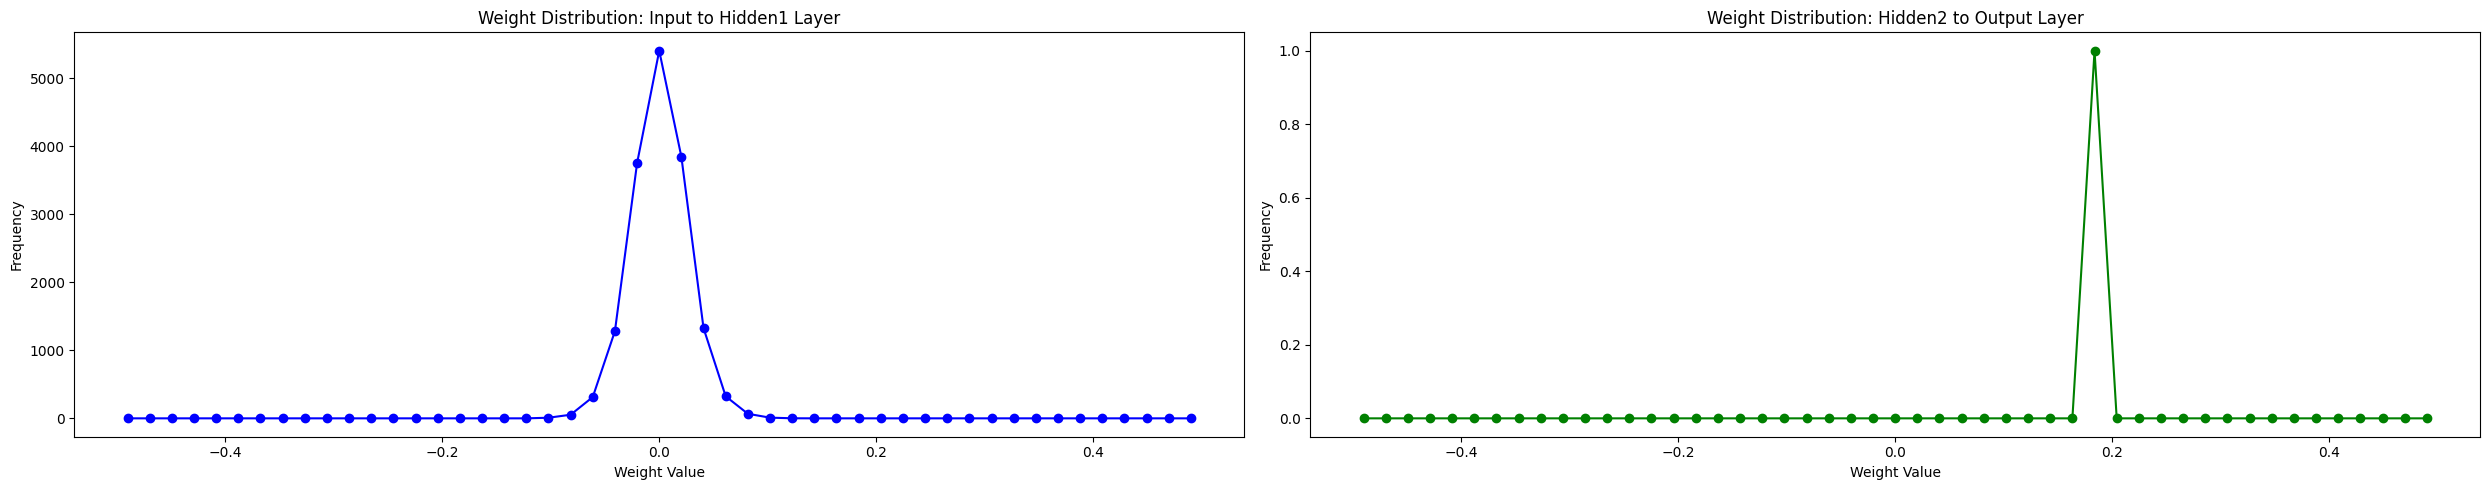

In [16]:
fc_weights = model.fc.weight.cpu().detach().numpy().flatten()
out_weights = model.out.weight.cpu().detach().numpy().flatten()

bins = np.linspace(-0.5, 0.5, 50) 
fc_hist, fc_bins = np.histogram(fc_weights, bins=bins)
out_hist, out_bins = np.histogram(out_weights, bins=bins)

fc_bin_centers = 0.5 * (fc_bins[:-1] + fc_bins[1:])
out_bin_centers = 0.5 * (out_bins[:-1] + out_bins[1:])

plt.figure(figsize=(25, 5))

plt.subplot(1, 2, 1)
plt.plot(fc_bin_centers, fc_hist, marker='o', linestyle='-', color='b')
plt.title('Weight Distribution: Input to Hidden1 Layer')
plt.xlabel('Weight Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.plot(out_bin_centers, out_hist, marker='o', linestyle='-', color='g')
plt.title('Weight Distribution: Hidden2 to Output Layer')
plt.xlabel('Weight Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [17]:
import torch

def count_nonzero_weights_above_threshold(layer, threshold=0.01):
    return torch.sum(torch.abs(layer.weight) > threshold).item()

threshold_value = 0.01 

nonzero_fc1 = count_nonzero_weights_above_threshold(model.fc, threshold=threshold_value)
nonzero_fc3 = count_nonzero_weights_above_threshold(model.out, threshold=threshold_value)

print(f'Number of non-zero weights greater than {threshold_value} in layer 1: {nonzero_fc1}')
print(f'Number of non-zero weights greater than {threshold_value} in layer 3: {nonzero_fc3}')

Number of non-zero weights greater than 0.01 in layer 1: 11068
Number of non-zero weights greater than 0.01 in layer 3: 64
